In [18]:
import sys

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

In [19]:
%cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'
/workspaces/IA/_5_Bayes-AD


/home/codespace/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt
from modulos.graficacion import plot_decision_regions
import pandas as pd
import numpy as np

# Árboles de decisión

Los _árboles de decisión_ son algoritmos de Machine learning capaces de realizar tareas de clasificación y regresión. El algoritmo **CART** (_Classification and Regression Tree_) es el implementado por scikit-learn para el entrenamiento de los árboles de decisión. Este produce sólo _árboles binarios_

Los árboles resultantes son monotécnicos: árboles cuyas regiones de decisión están dadas por segmentos de rectas que siempre son perpendiculares a uno de los ejes de características.

### Algoritmo
El algoritmo de crecimiento de un árbol se puede expresar de la siguiente forma:

GenerarArbol(D):

- IF $y=1$ $\forall (x,y) \in D$ o $y=0$ $\forall (x,y) \in D$:
    - return arbol
- ELSE:
    - Seleccionar la mejor característica $x_j$:
        - $D_0$ en el nodo hijo 0: $x_j = 0$ $\forall (x,y) \in D$  
        - $D_1$ en el nodo hijo 1: $x_j = 1$ $\forall (x,y) \in D$  
    - return GenerarArbol($D_0$), GenerarArbol($D_1$)

### Criterio de División
¿Cómo hago para seleccionar la mejor característica? La idea es buscar una medida en cada nodo de modo que los datos en los nodos hijos sean lo más puros posibles.

La impureza está relacionada a la cantidad de instancias que corresponden a distintas clases en el nodo. Sea $I(N)$ la impureza en el nodo N:

- $I(N)$ será 0 si todos los patrones que están presentes en el nodo pertenecen a la misma clase.
- $I(N)$ será máxima si hay igual cantidad de instancias de cada clase.


Con el algoritmo de estos clasificadores, iniciamos en la raiz del árbol y dividimos los datos teniendo en cuenta la característica que resulte en la mayor ganancia de información (IG). Mediante este proceso, continúa dividiendo cada nodo hijo hasta llegar a nodos hojas puros (es decir las muestras en estos nodos pertenecen a una sola clase), no quedan más características para continuar dividiendo o no quedan más instancias.

Esto en la práctica puede dar como resultado árboles profundos con muchos nodos, lo cual facilmente lleva al sobreajuste. Por esta razón, se suele realizar una poda (prune) para limitar la profundidad del árbol.

### Ganancia de Información (IG)

Función objetivo que se busca maximizar al dividir un nodo.

$$IG(D_p,f)=I(D_P)-\sum\limits_{j=1}^{m}\frac{N_j}{N_p}I(D_j)$$

$f$: es la característica que se usa para hacer la división

$m$: opciones posibles de la característica

$D_p$ y  $D_j$: son los conjuntos de datos del nodo padre y el *j-èsimo* nodo hijo.

$I$: es la medida de impureza.

$N_p$: es el número total de muestras de entrenamiento en el nodo padre.

$N_j$: es el número de muestras en el *j-èsimo* nodo hijo.

> La ganancia de información es sólo la diferencia entre la impureza del nodo padre y la suma de las impurezas de los nodos hijos. A menor impureza en los nodos hijos, mayor ganancia de información.

### Entropía (impureza de entropía)

$$H(t) = -\sum\limits_{i=1}^{c}p_i log_2(p_i)$$

### Impureza de Gini

$$G(t)=1-\sum\limits_{i=1}^{c}p_i^2$$

Siendo $p_i$ la proporción de muestras que pertenecen a la clase i para un nodo particular

$c$ es el número de clases

In [21]:
iris = load_iris()

In [22]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [23]:
X = iris.data[:,[2,3]] #'petal length (cm)', 'petal width (cm)'
y = iris.target
X.shape

(150, 2)

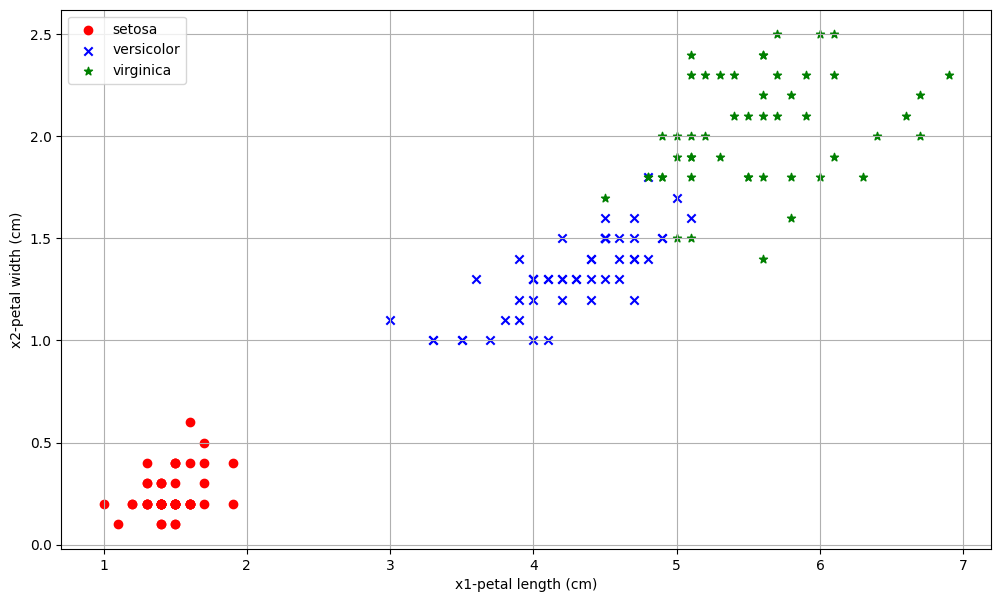

In [24]:
plt.figure(figsize=(12, 7))
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.scatter(X[100:150,0], X[100:150,1], color='green', marker='*', label='virginica')
plt.xlabel('x1-petal length (cm)')
plt.ylabel('x2-petal width (cm)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Documentación [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [25]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

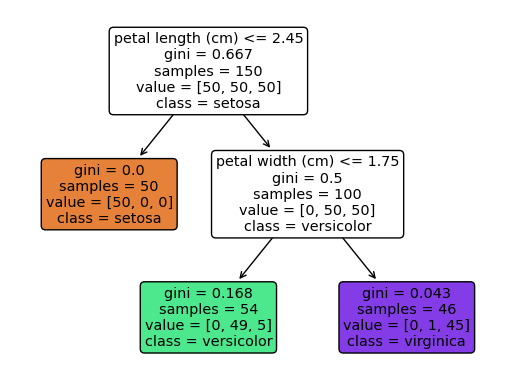

In [26]:
from sklearn import tree

tree.plot_tree(tree_clf,
               filled=True,
               rounded=True,
               class_names=['setosa', 'versicolor', 'virginica'],
               feature_names=iris.feature_names[2:]
               )
plt.show()

Instalador:
https://www.graphviz.org/download/

In [27]:
dot_data = export_graphviz(
        tree_clf,
        feature_names= iris.feature_names[2:],
        class_names= iris.target_names,
        rounded=True,
        filled=True,
)
graph = Source(dot_data)
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

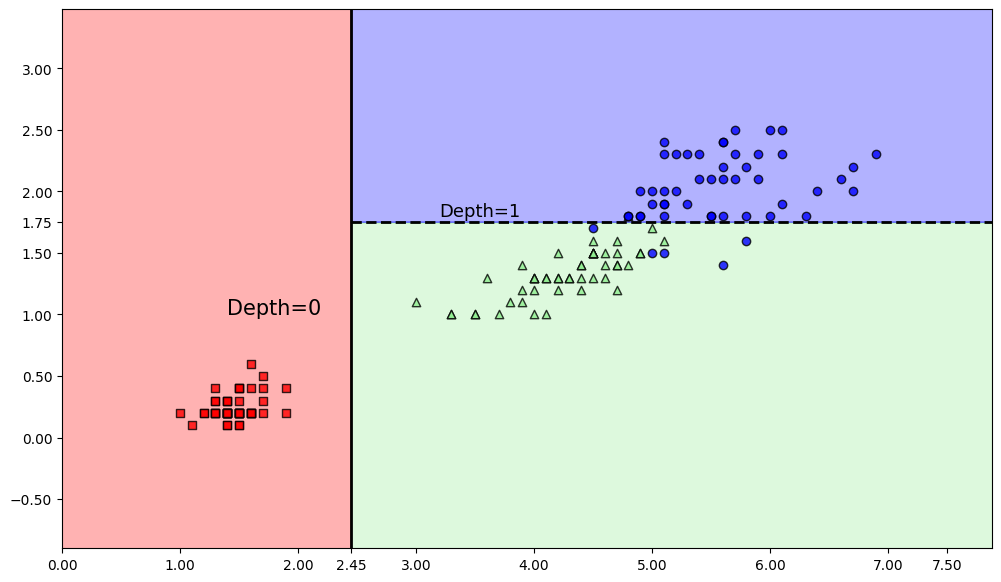

In [28]:
plt.figure(figsize=(12, 7))
plot_decision_regions(X, y, tree_clf)
plt.plot([2.45, 2.45], [-1, 3.5], "k-", linewidth=2)
plt.plot([2.45, 8], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.xticks([0,1,2,2.45,3,4,5,6,7, 7.5])
plt.yticks([-0.5, 0, 0.5, 1, 1.5, 1.75, 2, 2.5, 3])
plt.show()

In [29]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X,y)

dot_data = export_graphviz(
        tree_clf,
        feature_names= iris.feature_names[2:],
        class_names= iris.target_names,
        rounded=True,
        filled=True,
)
graph = Source(dot_data)
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

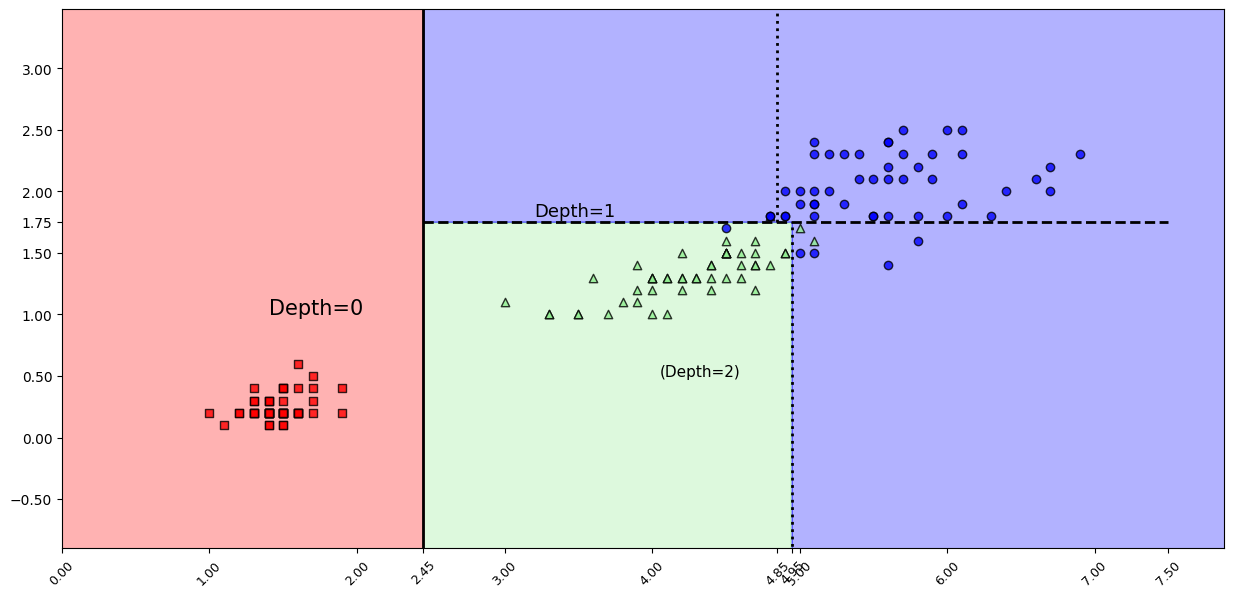

In [30]:
plt.figure(figsize=(15, 7))
plot_decision_regions(X, y, tree_clf)
plt.plot([2.45, 2.45], [-1, 4], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [-1, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 4], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.xticks([0,1,2,2.45,3,4,4.85, 4.95, 5,6,7, 7.5], rotation=45, fontsize=9)
plt.yticks([-0.5, 0, 0.5, 1, 1.5, 1.75, 2, 2.5, 3])
plt.show()

### Ejercicio:

Vamos a resolver el siguiente ejemplo:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-c3ow">Edad</th>
    <th class="tg-c3ow">Le gustan los perros</th>
    <th class="tg-c3ow">Le gusta la gravedad</th>
    <th class="tg-c3ow">Será astronauta</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">&lt;40</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&lt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&lt;40</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&lt;40</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0</td>
  </tr>
  <tr>
    <td class="tg-baqh">&gt;40</td>
    <td class="tg-baqh">No</td>
    <td class="tg-baqh">No</td>
    <td class="tg-baqh">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
</tbody>
</table>


In [31]:
"""
NODO PADRE [5 NO ,5 SI]
Hp = calculo de entropias = -5/10 log2 5/10 (clase1) - 5/10 log2 5/10 (clase2) = 1

Nivel 1: 

Edad
<40 [2,2] ; H<40 = 1 (mismo cacumo q Hp)
>40 [3,3] ; H>40 = 1
Ganancia de info: GI= Hp - 4/10 H<40 - 6/10 H>40 = 0

Perros
Si [1,4] ; Hsi = -1/5 log2 1/5 - 4/5 log2 4/5  = 0.72
No [4,1] ; Hno = -4/5 log2 4/5 - 1/5 log2 1/5  = 0.72
GI = 1 -5/10 0.72 - 5/10 0.72 = 0.28

Gravedad
Si [1,5] ; Hsi = -1/6 log2 1/6 - 5/6 log2 5/6  = 0.65
No [4,0] ; Hno = 0
GI = 1 - 6/10 0.65 - 0 = 0.61

Caracteristica deseable Gravedad
        gravedad?
Si              No (clase 0)

Nivel 2:
volvemos a hacer calculos de entropia con ese Si como padre
Hp = -1/6 log2 1/6 - 5/6 log2 5/6  = 0.65

Edad
<40 [0,2] ; H<40 = 0 
>40 [1,3] ; H>40 = -1/4 log2 1/4 - 3/4 log2 3/4  = 0.85
GI = 0.65 - 0 - 4/6 0.85 = 0.11

Perros
Si [0,4] ; Hsi = 0
No [1,1] ; Hno = 1
GI = 0.65 - 0 - 2/6 = 0.32

Caracteristica deseable Gravedad; Perros; 
                        gravedad?
            Si [1,5]                          No (clase 0)
            perros?
Si(clase 1)             No[1,1]
                        edad >40?
                Si(clase 0)         No (clase 1)
                
"""

'\nNODO PADRE [5 NO ,5 SI]\nHp = calculo de entropias = -5/10 log2 5/10 (clase1) - 5/10 log2 5/10 (clase2) = 1\n\nNivel 1: \n\nEdad\n<40 [2,2] ; H<40 = 1 (mismo cacumo q Hp)\n>40 [3,3] ; H>40 = 1\nGanancia de info: GI= Hp - 4/10 H<40 - 6/10 H>40 = 0\n\nPerros\nSi [1,4] ; Hsi = -1/5 log2 1/5 - 4/5 log2 4/5  = 0.72\nNo [4,1] ; Hno = -4/5 log2 4/5 - 1/5 log2 1/5  = 0.72\nGI = 1 -5/10 0.72 - 5/10 0.72 = 0.28\n\nGravedad\nSi [1,5] ; Hsi = -1/6 log2 1/6 - 5/6 log2 5/6  = 0.65\nNo [4,0] ; Hno = 0\nGI = 1 - 6/10 0.65 - 0 = 0.61\n\nCaracteristica deseable Gravedad\n        gravedad?\nSi              No (clase 0)\n\nNivel 2:\nvolvemos a hacer calculos de entropia con ese Si como padre\nHp = -1/6 log2 1/6 - 5/6 log2 5/6  = 0.65\n\nEdad\n<40 [0,2] ; H<40 = 0 \n>40 [1,3] ; H>40 = -1/4 log2 1/4 - 3/4 log2 3/4  = 0.85\nGI = 0.65 - 0 - 4/6 0.85 = 0.11\n\nPerros\nSi [0,4] ; Hsi = 0\nNo [1,1] ; Hno = 1\nGI = 0.65 - 0 - 2/6 = 0.32\n\nCaracteristica deseable Gravedad; Perros; \n                        gra

### Entregables:

En la siguiente tabla se tienen datos acerca de la realización o suspensión de partidos de tenis en función del pronóstico del tiempo:


<table>
    <tbody>
        <tr>
            <td> </td>
            <td>Pronóstico</td>
            <td>Temperatura</td>
            <td>Humedad</td>
            <td>Viento</td>
            <td>Juega</td>
        </tr>
        <tr>
            <td>1</td><td>soleado</td><td>calor</td><td>alta</td><td>no</td><td>no</td>
        </tr>
        <tr>
            <td>2</td><td>soleado</td><td>calor</td><td>alta</td><td>si</td><td>no</td>
        </tr>
        <tr>
            <td>3</td><td>nublado</td><td>calor</td><td>alta</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>4</td><td>lluvioso</td><td>moderado</td><td>alta</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>5</td><td>lluvioso</td><td>frío</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>6</td><td>lluvioso</td><td>frío</td><td>normal</td><td>si</td><td>no</td>
        </tr>
        <tr>
            <td>7</td><td>nublado</td><td>frío</td><td>normal</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>8</td><td>soleado</td><td>moderado</td><td>alta</td><td>no</td><td>no</td>
        </tr>
        <tr>
            <td>9</td><td>soleado</td><td>frío</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>10</td><td>lluvioso</td><td>moderado</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>11</td><td>soleado</td><td>moderado</td><td>normal</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>12</td><td>nublado</td><td>moderado</td><td>alta</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>13</td><td>nublado</td><td>calor</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>14</td><td>lluvioso</td><td>moderado</td><td>alta</td><td>si</td><td>no</td>
        </tr>
    </tbody>
</table>



1. Construya a mano (haciendo todas las cuentas) y dibuje a mano el árbol binario de decisión que describa los datos sobre juegos de tenis del cuadro.
Utilice la impureza de entropía.

2. Construya el árbol de decisión usando la clase `DecisionTreeClassifier`, para esto será necesario codificar los datos. Utilice `LabelEncoder`, `OrdinalEncoder` o `OneHotEncoder` pruebe distintas formas de codificar. Obtiene las mismas particiones que el árbol hecho a mano? Si o No? Por qué?

In [32]:
df_tennis = pd.read_csv('./1_datos/Play Tennis.csv')

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

# Separate features (X) and target variable (y)
X = df_tennis.iloc[:, :-1]
y = df_tennis.iloc[:, -1]

# Encode categorical features using different methods
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder()

X_label_encoded = X.apply(label_encoder.fit_transform)
X_ordinal_encoded = ordinal_encoder.fit_transform(X)
X_onehot_encoded = onehot_encoder.fit_transform(X)

# Build Decision Tree Classifiers using the encoded data
dt_label_encoded = DecisionTreeClassifier().fit(X_label_encoded, y)
dt_ordinal_encoded = DecisionTreeClassifier().fit(X_ordinal_encoded, y)
dt_onehot_encoded = DecisionTreeClassifier().fit(X_onehot_encoded, y)


from sklearn import tree
tree.plot_tree(dt_onehot_encoded,
               filled=True,
               rounded=True,
               class_names=["No juega", "Juega"],
               feature_names= X.columns[]
              )
plt.show()


,Pronóstico,Temperatura,Humedad,Viento
0,soleado,calor,alta,no
1,soleado,calor,alta,si
2,nublado,calor,alta,no
3,lluvioso,moderado,alta,no
4,lluvioso,frío,normal,no
5,lluvioso,frío,normal,si
6,nublado,frío,normal,si
7,soleado,moderado,alta,no
8,soleado,frío,normal,no
9,lluvioso,moderado,normal,no


In [33]:
"""
[5,9]
Hp = -5/14 log2 5/14 (clase 0) - 9/14 log2 9/14 (clase 1) = 0.94

Nivel 1:
Pronostico
soleado [3,2] ; Hs = -3/5 log 3/5 - 2/5 log 2/5 = 0.97
nublado [0,4] ; Hn = 0
lluvioso [2,3] ; Hl = 0.97
GI = 0.94 - 5/14 0.97 - 0 - 5/14 0.97 = 0.25

Temperatura
calor [2,2] ; Hc = 1
moderado [2,4] ; Hm = -2/6 log 2/6 - 4/6 log 4/6 = 0.92
frio [1,3] ; Hf = -1/4 log 1/4 - 3/4 log 3/4 = 0.81
GI = 0.94 - 4/14 - 6/14 0.92 - 4/14 0.81 = 0.03

Humedad
alta [4,3] ; Ha = -4/7 log 4/7 - 3/7 log 3/7 = 0.99
normal [1,6] ; Hnor = -1/7 log 1/7 - 6/7 log 6/7 = 0.59
GI = 0.94 - 7/14 0.99 - 7/14 0.59 = 0.15

Viento
si [3,3] ; Hsi = 1
no [2,6] ; Hno = -2/8 log 2/8 - 6/8 log 6/8 = 0.81
GI = 0.94 - 6/14 - 8/14 0.81 = 0.05

Caracteristica deseable: Nublado
"""

'\n[5,9]\nHp = -5/14 log2 5/14 (clase 0) - 9/14 log2 9/14 (clase 1) = 0.94\n\nNivel 1:\nPronostico\nsoleado [3,2] ; Hs = -3/5 log 3/5 - 2/5 log 2/5 = 0.97\nnublado [0,4] ; Hn = 0\nlluvioso [2,3] ; Hl = 0.97\nGI = 0.94 - 5/14 0.97 - 0 - 5/14 0.97 = 0.25\n\nTemperatura\ncalor [2,2] ; Hc = 1\nmoderado [2,4] ; Hm = -2/6 log 2/6 - 4/6 log 4/6 = 0.92\nfrio [1,3] ; Hf = -1/4 log 1/4 - 3/4 log 3/4 = 0.81\nGI = 0.94 - 4/14 - 6/14 0.92 - 4/14 0.81 = 0.03\n\nHumedad\nalta [4,3] ; Ha = -4/7 log 4/7 - 3/7 log 3/7 = 0.99\nnormal [1,6] ; Hnor = -1/7 log 1/7 - 6/7 log 6/7 = 0.59\nGI = 0.94 - 7/14 0.99 - 7/14 0.59 = 0.15\n\nViento\nsi [3,3] ; Hsi = 1\nno [2,6] ; Hno = -2/8 log 2/8 - 6/8 log 6/8 = 0.81\nGI = 0.94 - 6/14 - 8/14 0.81 = 0.05\n\nCaracteristica deseable Pronóstico: Nublado\n\nNublado?\nSi[0,4] clase 1               No[5,5] clase\n'

In [34]:
""""
Nivel 2:
Hp = 1

Pronostico
soleado [3,2] ; Hs = -3/5 log 3/5 - 2/5 log 2/5 = 0.97
lluvioso [2,3] ; Hl = 0.97
GI = 1 - 5/10 0.97 - 5/10 0.97 = 0.03

Temperatura
calor [2,1] ; Hc = -2/3 log 2/3 - 1/3 log 1/3 = 0.91
moderado [2,3] ; Hm = -2/5 log 2/5 - 3/5 log 3/5 = 0.97
frio [1/2] ; Hf = -1/3 log 1/3 - 2/3 log 2/3 = 0.92
GI = 1 - 3/11 0.91 - 5/11 0.97 - 3/11 0.92 = 0.06

Humedad
alta [4,1] ; Ha = -4/5 log 4/5 - 1/5 log 1/5 = 0.72
normal [1,5] ; Hnor = -1/6 log 1/6 - 5/6 log 5/6 = 0.65
GI = 1 - 5/11 0.72 - 6/11 0.65 = 0.32

Viento
si [2,2] ; Hsi = 1
no [2,3] ; Hno = -2/5 log 2/5 - 3/5 log 3/5 = 0.97
GI = 1 - 4/9 - 5/9 0.97 = 0.02

Caracteristica deseable: Humedad
"""

'"\nNivel 2:\nHp = 1\n\nPronostico\nsoleado [3,2] ; Hs = -3/5 log 3/5 - 2/5 log 2/5 = 0.97\nlluvioso [2,3] ; Hl = 0.97\nGI = 1 - 5/10 0.97 - 5/10 0.97 = 0.03\n\nTemperatura\ncalor [2,1] ; Hc = -2/3 log 2/3 - 1/3 log 1/3 = 0.91\nmoderado [2,3] ; Hm = -2/5 log 2/5 - 3/5 log 3/5 = 0.97\nfrio [1/2] ; Hf = -1/3 log 1/3 - 2/3 log 2/3 = 0.92\nGI = 1 - 3/11 0.91 - 5/11 0.97 - 3/11 0.92 = 0.06\n\nHumedad\nalta [4,1] ; Ha = -4/5 log 4/5 - 1/5 log 1/5 = 0.72\nnormal [1,5] ; Hnor = -1/6 log 1/6 - 5/6 log 5/6 = 0.65\nGI = 1 - 5/11 0.72 - 6/11 0.65 = 0.32\n\nViento\nsi [2,2] ; Hsi = 1\nno [2,3] ; Hno = -2/8 log 2/8 - 6/8 log 6/8 = 0.81\nGI = 1 - 6/14 - 8/14 0.81 = \n\nCaracteristica deseable Pronóstico: \n\n\n\n'

In [ ]:
"""
Nivel 3:
Humedad alta = normal: [4,1] : Hp = -4/5 log2 4/5 (clase 0) - 1/5 log2 1/5 (clase 1) = 0.72

Pronostico (Humedad normal)               Pronostico (Humedad alta)
soleado [2,0] ; Hs = 0                  soleado [3,0] ; Hs = 0
lluvioso [2,1] ; Hl = 0.91              lluvioso [1,1] ; Hl = 1 
GI = 0.72 - 0 - 3/5 0.91= 0.17         GI = 0.72 - 0 - 2/5 = 0.32  

Temperatura (Humedad normal)            Temperatura (Humedad alta)
calor [0,0] ; Hc = 0                    calor [2,0] ; Hc = 0
moderado [2,0] ; Hm = 0                 moderado [2,2] ; Hm = 1
frio [2,1] ; Hf = 0.91                  frio [0,0] ; Hf = 0
GI = 0.72 - 0 - 3/5 0.91 = 0.17         GI = 0.72 - 0 - 4/6 - 0 = 0.05

Viento (Humedad normal)                 Viento (Humedad alta)
si [3,0] ; Hsi = 0                      si [2,0] ; Hsi = 0
no [1,1] ; 1                            no [2,2] ; 1
GI = 0.72 - 0 - 2/5 = 0.32              GI = 0.72 - 0 - 4/6 = 0.05

Caracteristica deseable: viento         Caracteristica deseable: pronostico
"""

In [ ]:
"""
Nivel 4: Hp = 1 

Temperatura (Lluvia)                    Pronostico (Sin viento)
moderado [1,1] ; Hm = 1                 soleado [1,0] ; Hs = 0
frio [0,0] ; Hf = 0                     lluvioso [2,0] ; Hl = 0
GI = 1 - 1 = 0                          GI = 0.72 

Viento (Lluvia)                         Temperatura (Sin viento)
si [1,0] ; Hsi = 0                      calor [0,0] ; Hc = 0
no [0,1] ; Hno = 0                      moderado [0,1] ; Hm = 0
GI = 0.72                               GI = 0.72 }

Caracteristica deseable: viento         Caracteristica deseable:
"""

In [ ]:
# árbol

"""
                        Nublado?
Si[0,4] clase 1                                 No[5,5] 
                                                Humedad?
                        Alta [4,1]                                      Normal [1,5]
                        Soleado o lluvioso?                             Hay viento?
      Sol [3,0] Clase 0        Luvia [1,1]                  Si [3,0] clase 0          No [1,1]   
                              Hay viento?                                           temp. moderada?
                  Si [1,0] clase 0     No [0,1] clase 1                            Si [0,1] clase 1




"""